In [1]:
import pandas as pd
import numpy as np
import os, glob
from matplotlib import pyplot as plt


In [2]:
# paths
feature_update_base_path = "../../outputs/feature_importance/time_related_feature/"
feature_update_paths = glob.glob(os.path.join(feature_update_base_path + "feature_update_in_practice/", "feature_update_in_practice*"))
feature_update_nfstream_path = feature_update_base_path + "feature_update_flow_sliced.csv"

In [3]:
# features
time_features = ["bidirectional_duration_ms", 
                 "bidirectional_min_piat_ms", 
                 "bidirectional_mean_piat_ms", 
                 "bidirectional_max_piat_ms", 
                 "src2dst_duration_ms", 
                 "src2dst_min_piat_ms", 
                 "src2dst_mean_piat_ms", 
                 "src2dst_max_piat_ms", 
                 "dst2src_duration_ms", 
                 "dst2src_min_piat_ms", 
                 "dst2src_mean_piat_ms", 
                 "dst2src_max_piat_ms", 
                 "splt_piat_ms_1", 
                 "splt_piat_ms_2", 
                 "splt_piat_ms_3", 
                 "splt_piat_ms_4", 
                 "splt_piat_ms_5", 
                 "splt_piat_ms_6", 
                 "splt_piat_ms_7"]

# time_features = [ "bidirectional_min_piat_ms", 
#                  "bidirectional_mean_piat_ms", 
#                  "bidirectional_max_piat_ms", 
#                  "src2dst_min_piat_ms", 
#                  "src2dst_mean_piat_ms", 
#                  "src2dst_max_piat_ms", 
#                  "dst2src_min_piat_ms", 
#                  "dst2src_mean_piat_ms", 
#                  "dst2src_max_piat_ms", 
#                  "splt_piat_ms_1", 
#                  "splt_piat_ms_2", 
#                  "splt_piat_ms_3", 
#                  "splt_piat_ms_4", 
#                  "splt_piat_ms_5", 
#                  "splt_piat_ms_6", 
#                  "splt_piat_ms_7"]


# feature dictionary
feature_dict = {}
for feature in time_features:
    feature_dict[feature] = []
    

# parse the feature update dataset
for path in feature_update_paths:
    # read lines
    with open(path, 'r') as f:
        lines = f.readlines()
    # parse each line
    for line in lines:
        line = line.replace("RuntimeCmd: ", '').strip("\n").split("= ", 1)
        feature_name = line[0].replace("_register[0]", '')
        if feature_name in time_features:
            # minus 1 for each splt feature
            # why? added 1 for each splt feature in P4 program
            feature_value = int(line[1])
            if "splt" in feature_name:
                feature_value = feature_value - 1
            feature_dict[feature_name].append(feature_value)

In [4]:
# read feature values from bmv2
for feature in feature_dict:
    print(f"{feature}: {feature_dict[feature]}")

bidirectional_duration_ms: [58689, 58134, 59772, 59971, 60075, 59031, 59430, 58485, 57824, 58634]
bidirectional_min_piat_ms: [271, 265, 317, 210, 179, 283, 295, 200, 333, 203]
bidirectional_mean_piat_ms: [14257, 13675, 14175, 14340, 14345, 13728, 14091, 13656, 13820, 14229]
bidirectional_max_piat_ms: [28680, 29536, 30023, 30006, 29551, 30000, 30046, 29492, 28751, 28648]
src2dst_duration_ms: [58689, 58134, 59772, 59971, 60075, 59031, 59430, 58485, 57824, 58634]
src2dst_min_piat_ms: [2826, 3122, 3065, 3059, 3106, 3431, 2993, 3098, 2704, 2999]
src2dst_mean_piat_ms: [21242, 20805, 21434, 21570, 21591, 21050, 21302, 20884, 20839, 21194]
src2dst_max_piat_ms: [29584, 29923, 30740, 30602, 30677, 30431, 30658, 30336, 29585, 29491]
dst2src_duration_ms: [32076, 33369, 33615, 33625, 33203, 34302, 33487, 33356, 32210, 32153]
dst2src_min_piat_ms: [3125, 3568, 3275, 3409, 3473, 4019, 3146, 3664, 3126, 3302]
dst2src_mean_piat_ms: [16038, 16684, 16807, 16812, 16601, 17151, 16743, 16678, 16105, 16076]
d

In [4]:
# read feature values from NFStream
df = pd.read_csv(feature_update_nfstream_path)

In [ ]:
# plot the figure of difference in measured value of feature between Bmv2 and NFStream
indices = np.arange(1, 11, 1)
for feature in feature_dict:
    # figure path
    fig_path = feature_update_base_path + "figs/" + feature + "_fig"
    # convert millisecond to microsecond
    value_nfstream = int(df[feature]) * 1000
    baseline = [value_nfstream] * len(feature_dict[feature])

    plt.plot(indices, feature_dict[feature], 'o-', label="Measured in BMv2 Switch")
    plt.plot(indices, baseline, label="Measured in NFStream")
    plt.xlabel("Experiment Index")
    plt.ylabel("Feature Value (μs)")
    plt.title(f"Difference in Measured Value of {feature} \n Between BMv2 and NFStream")
    plt.legend()
    plt.show()
    # plt.savefig(fig_path)
    plt.clf()

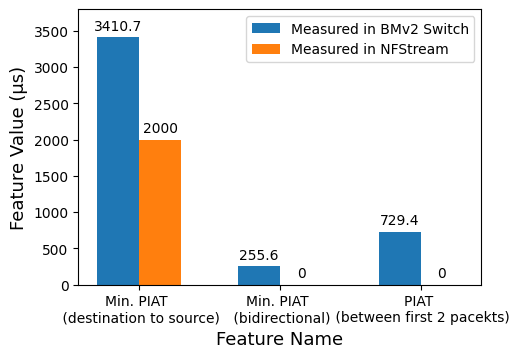

In [6]:
# the mean of each feature measured in switch
switch_feature_mean_list = []
switch_feature_std_list = []
nfstream_feature_list = []
for feature in feature_dict:
    # feature value list of a feautre in the switch
    switch_feature_val_list = feature_dict[feature]
    switch_mean_val_tmp = np.mean(switch_feature_val_list)
    switch_std_val_tmp = np.std(switch_feature_val_list)
    switch_feature_mean_list.append(switch_mean_val_tmp)
    switch_feature_std_list.append(switch_std_val_tmp)
    # value in nfstream
    nfstream_val = int(df[feature]) * 1000
    nfstream_feature_list.append(nfstream_val)


# get the features to plot
feature_plot = ["dst2src_min_piat_ms", "bidirectional_min_piat_ms", "splt_piat_ms_2"]
feature_full_names = ["destination to source \n minimum packet \n inter arrival time", 
                    "bidirectional \n minimum packet \n inter arrival time", 
                    "packet inter arrival time \n between first and \n second packet"]

feature_full_names = ["Min. PIAT \n (destination to source)", 
                    "Min. PIAT \n (bidirectional)", 
                    "PIAT \n (between first 2 pacekts)"]
# save the mean and std value of a feature in switch, as well as the value in nfstream
switch_plot_mean_list = []
switch_plot_std_list = []
nfstream_plot_list = []
for feature in feature_plot:
    switch_mean = switch_feature_mean_list[time_features.index(feature)]
    switch_std = switch_feature_std_list[time_features.index(feature)]
    nfstream_val = nfstream_feature_list[time_features.index(feature)]
    switch_plot_mean_list.append(switch_mean)
    switch_plot_std_list.append(switch_std)
    nfstream_plot_list.append(nfstream_val)



################################### plot ##################################
factor = 0.65
fig = plt.figure(figsize=(8 * factor, 5.5 * factor))

# Set the width of each bar
bar_width = 0.3
# Calculate the x positions for each set of bars
x_pos1 = np.arange(len(feature_plot))
x_pos2 = [x + bar_width for x in x_pos1]

log_plot = False
# plot standard derivation
# rects1 = plt.bar(x_pos1, switch_plot_mean_list, yerr=switch_plot_std_list, align='center', ecolor='black', capsize=8, width=bar_width, log=log_plot, label="Measured in BMv2 Switch")
# plot without standard derivation
rects1 = plt.bar(x_pos1, switch_plot_mean_list, width=bar_width, log=log_plot, label="Measured in BMv2 Switch")
rects2 = plt.bar(x_pos2, nfstream_plot_list, width=bar_width, log=log_plot, label="Measured in NFStream")

# Add numbers on top of each bar
for rects in [rects1, rects2]:
    for rect in rects:
        height = rect.get_height()
        plt.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

fig_path = "../../evaluation/figs/time_feature_comparison.png"

fontsize_val = 13
plt.xlabel("Feature Name", fontsize=fontsize_val)
plt.ylabel("Feature Value (μs)", fontsize=fontsize_val)
plt.ylim([0, 3800])
plt.xticks([x + bar_width/2 for x in x_pos1], feature_full_names)
plt.legend()
plt.savefig(fig_path, dpi=300, bbox_inches="tight")
plt.show()




# ################################## plot ##################################
# fig, axs = plt.subplots(1, 4, figsize=(20, 5))
# fig.tight_layout()
# log_plot = False

# for i, feature in enumerate(feature_plot):
#     # get the mean and std value of a feature in switch, as well as the value in nfstream
#     switch_mean = switch_feature_mean_list[time_features.index(feature)]
#     switch_std = switch_feature_std_list[time_features.index(feature)]
#     nfstream_val = nfstream_feature_list[time_features.index(feature)]

#     print(i)
#     print(switch_mean)
#     print(switch_std)
#     print(nfstream_val)

#     axs[i].bar(x_pos1, switch_mean, yerr=switch_std, width=bar_width, log=log_plot, label="Measured in BMv2 Switch")
#     axs[i].bar(x_pos2, nfstream_val, width=bar_width, log=log_plot, label="Measured in NFStream")
#     axs[i].set(xlabel="Feature Name", ylabel="Feature Value (μs)")
#     axs[i].legend()
#     # plt.show()


